 # **Project: Investigate a Dataset ( TMDB-Movies Dataset)**
**Table of Contents:**
 - Introduction
 - Data Wrangling
 - Exploratory Data Analysis
 - Conclusions


# Introduction:
 ## Overview:
 I have used TMDb movies Dataset for my project to complete my **Data Analysis Project.**
 This Dataset contains various 21 columns like IMDb ID,Popularity,Budget,Revenue,Cast,Director,Runtime etc. about 10000 movies.
 
 **Questions that can be analysed from this Dataset:**
 
 1) Average runtime of all the movies in the Dataset? <br>
 2) which movie make the highest profit? <br>
 3) which movie make the least profit? <br>
 4) In which year we had most no.of profitable movies? <br>
 5) Movie which had the least revenue?<br>
 6) Movie which had the most revenue? <br>
 7) which movie has the longest and shortest runtime?<br>
 8) Which director directed most films?<br>
 9) Which genre were more successful? <br>
 10)Average budget of all the Profitable movies? <br>
 11)Average runtime of all the profitable movies? <br>
 12) Average revenue of all the profitable movies? <br>
 13) which cast were in the most profitable movies?

In [16]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# **Data Wrangling**
 Now my next Task is to clean this Dataset that is to remove the unused column and data from this Dataset, but first we need to  examine this Dataset , lets see what do i have here in this Dataset.

In [61]:

#loading the csv file,storing it in the variable "da_tmbd"
da_tmdb = pd.read_csv('G:/udacity/tmdb/tmdb-movies.csv')
#Printing only first five rows of this dataset,so that i can examine what i have.
da_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 ## **Observations:**
 - The columns **'budget', 'revenue', 'budget_adj', 'revenue_adj'** has not given us the currency , I will take $ as the currency.<br>
 - **vote_count** is not similiar for every movie,so popularity measure would be unfair using **vote_average** column.<br>
 
 ## **Whats need to be cleaned and wrangled?**
  - I need to remove certain column which is not useful for answering my questions like id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.<br>
  - coverting date given in release date column into Date format.
  - This dataset has some duplicate rows ,its need to remove it.
  - Intoducing the currency Symbol
  - Replacing zero with NAN.

## ** Removing unused columns from the dataset:**

That is removing id, imdb_id, popularity, overview, production_companies, vote_count ,vote_average, budget_adj, revenue_adj, homepage, keywords.

In [65]:
#creating a list which consists of the column need to be deleted
del_c=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 
     'vote_count', 'vote_average']
#deleting,axis=1 for column
da_tmdb = da_tmdb.drop(del_c,1)
#displaying few rows of modified dataset
da_tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


Now lets remove Duplicate Rows:

In [66]:
#removing the duplicates and keeping the first one of it.
da_tmdb.drop_duplicates(keep = 'first', inplace = True)

In [68]:
#displaying
r,c = da_tmdb.shape
print('now our dataset has {} rows and {} columns'.format(r-1,c))

now our dataset has 10864 rows and 10 columns


### ** Coverting the release date into appropiate date format: **

In [69]:
da_tmdb.release_date=pd.to_datetime(da_tmdb['release_date'])
da_tmdb.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### **Removing movies which has 0 in revenue and budget columns ** 

In [70]:
column = ['budget','revenue']
#now replace the value of '0' to NaN in the specified columns
da_tmdb[column]=da_tmdb[column].replace(0,np.NaN)
#now we will remove the row which contain NaN value in budget and revenue column
da_tmdb.dropna(subset = column, inplace = True)
#displaying the remaining rows 
r , c = da_tmdb.shape
print('now we have {} rows inour dataset'.format(r-1))

now we have 3853 rows inour dataset


Now if we see runtime also has 0 in its column which isn't possible so I will replace it with NaN.

In [71]:
da_tmdb['runtime']=da_tmdb['runtime'].replace(0,np.NaN)

### ** Checking the format of each column and observing:**

In [72]:
da_tmdb.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Now ,we can see see budget and revenue should be in 'int' format for our calculation but they aren't so we need to convert them ,Lets do it

In [74]:
columns = ['budget','revenue']
#changing the format of values in budget and revenue column into integer
da_tmdb[columns]=da_tmdb[columns].applymap(np.int64)

lets check:

In [75]:
da_tmdb.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

# ** EXPLORATORY DATA ANALYSIS : **


  Lets,start with this part and answer our questions <br>
  
  1.Average runtime of all the movies in the Dataset?

In [77]:
#a function which return the mean of the values in da_tmdb
def avg_val(x):
    return da_tmdb[x].mean()
#calculating average runtime
avg_val('runtime')

109.22029060716139

Now 109 minutes is average runtime for the movies,lets see it graphically.

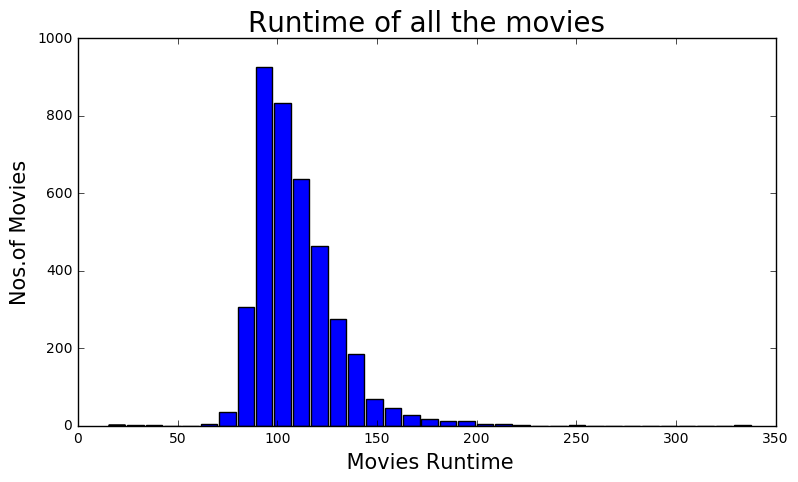

In [80]:


#we need to give the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel(' Movies Runtime', fontsize = 15)
plt.ylabel('Nos.of Movies', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=20)

#giving a histogram plot
plt.hist(da_tmdb['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

So , now we can see graphically also avg runtime lies between 100 -120 respectively,so we are doing calculations correctly,
lets go through our next question

### ** 2) which movie make the highest profit? **

In [88]:
#instead of creating a list we create a additional column of profit 
#we use insert function(index of the column, name of the column, value to be inserted)
da_tmdb.insert(2,'profit_made',da_tmdb['revenue']-da_tmdb['budget'])

#displaying the modified dataset
da_tmdb.head(1)

,budget,revenue,profit_made,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


now, lets check which make the highest profit

In [89]:
high_index=da_tmdb['profit_made'].idxmax()
h_details = pd.DataFrame(da_tmdb.loc[high_index])
h_details

,1386
budget,237000000
revenue,2781505847
profit_made,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00


## **3)Movie which make the least profit?**

In [90]:
Low_index=da_tmdb['profit_made'].idxmin()
L_details = pd.DataFrame(da_tmdb.loc[Low_index])
L_details

,2244
budget,425000000
revenue,11087569
profit_made,-413912431
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
release_date,2010-12-02 00:00:00


# **4)In which year we had most no.of profitable movies? **

In [91]:
#lets calculate all the profit made by a movie in a perticular year
profit_year=da_tmdb.groupby('release_year')['profit_made'].sum()
profit_year.idxmax()

2015

So,2015 was the year with most profitable films , lets observe it graphically.

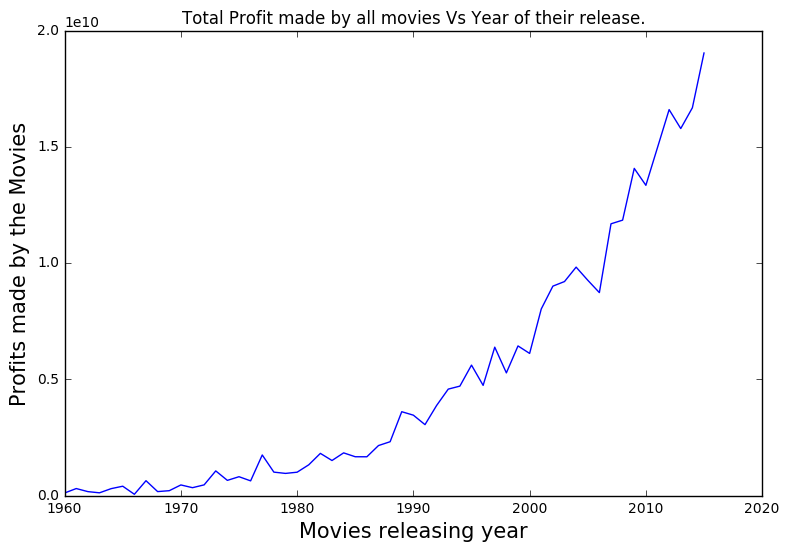

In [93]:
#setting up the figure size
plt.figure(figsize=(9,6), dpi = 100)
plt.xlabel('Movies releasing year', fontsize = 15)
plt.ylabel('Profits made by the Movies', fontsize = 15)
#title
plt.title('Total Profit made by all movies Vs Year of their release.')
#plotting the graph
plt.plot(profit_year)
#displaying
plt.show()

So , graphically too 2015 was the year with the most profitable movies.

# ** 5) Movie which had the least revenue? **

In [95]:
L_revenue=da_tmdb['revenue'].idxmin()
L_details_rev = pd.DataFrame(da_tmdb.loc[L_revenue])
L_details_rev

,5067
budget,6000000
revenue,2
profit_made,-5999998
original_title,Shattered Glass
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,Billy Ray
tagline,NaN
runtime,94
genres,Drama|History
release_date,2003-11-14 00:00:00


# ** 6) Movie which had most revenue?**

In [96]:
#calculating the movie which has highest value in revenue column
h_revenue=da_tmdb['revenue'].idxmax()
#storing its details
h_details_rev = pd.DataFrame(da_tmdb.loc[h_revenue])
h_details_rev

,1386
budget,237000000
revenue,2781505847
profit_made,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00


# ** 7)which movie has the longest and shortest runtime? **

In [98]:
L_run=da_tmdb['runtime'].idxmin()
L_details_run = pd.DataFrame(da_tmdb.loc[L_run])
h_run=da_tmdb['runtime'].idxmax()
h_details_run = pd.DataFrame(da_tmdb.loc[h_run])
#concatenating both
one_col = pd.concat([h_details_run, L_details_run], axis = 1)



In [99]:
#displaying
one_col

,2107,5162
budget,18000000,10
revenue,871279,5
profit_made,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


# **8)Which director directed most films? **

In [104]:
#will take director column, and separate the string by ','
dir_data = da_tmdb['director'].str.cat(sep = ',')
#will give pandas series and storing the values separately
dir_data = pd.Series(dir_data.split(','))
#this will us value in descending order
count = dir_data.value_counts(ascending = False)
count.head(1)

Steven Spielberg    27
dtype: int64

So , Steven Spielberg was the director with most film.

## **9) Which genre were more successful? **

Now, as we know profit_made column conatins negative as well as positive values, so we need to set a specific bar for a profit ,so lets set above 40 million dollars earnings to be profitable.

In [103]:
#movies having profit $40M or more
da_profit = da_tmdb[da_tmdb['profit_made'] >= 40000000]

#we need to reindexing new data
da_profit.index = range(len(da_profit))

#displaying
da_profit.head(1)

,budget,revenue,profit_made,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [106]:
#now we will calculate the most successful genre
#will take genre column, and separate the string by ','
gen_data = da_profit['genres'].str.cat(sep = ',')
#will give pandas series and storing the values separately
gen_data = pd.Series(gen_data.split(','))
#this will us value in descending order
count2 = gen_data.value_counts(ascending = False)
count2.head(1)

Comedy    96
dtype: int64

** So,COMEDY is the most successful genre. **

## **10) Average budget of all the profitable movies? **

In [108]:
da_profit['budget'].mean()

57308877.083054252

## ** 11)Average runtime of all the profitable movies? **

In [109]:
da_profit['runtime'].mean()

113.19624916275954

So, average runtime of all the profitable movies is 113 minutes.

## ** 12) Average revenue of all the profitable movies? **

In [111]:
da_profit['revenue'].mean()

236306323.37374413

## ** 13) which cast were in the most profitable movies? **


In [113]:
#will take cast column, and separate the string by '|'
cast_data = da_profit['cast'].str.cat(sep = '|')
#will give pandas series and storing the values separately
cast_data = pd.Series(cast_data.split('|'))
#this will us value in descending order
count3 = cast_data.value_counts(ascending = False)
count3.head(1)

Tom Cruise    27
dtype: int64

# **CONCLUSION : **

It was very interesting analysing this dataset , we came up with various facts and thw answers.<br>
** so for Successful movies - ** <br>
 - average budget was around 57 million dollar.<br>
 - average runtime was around 113 minutes.<br>
 - most successful genre is Comedy. <br>
and ,the fun part Tom cruise were part of 27 successful movies more than any cast.

My calculation might not totally be error free as I have assumed the profitable value to be around $40 million , So my calculation might get error. Also there were no currency information in budget as well as the revenue so i assumed them dollar, which can be considered as limitation of this analysis.